# Extraction of glottal features from audio files

Compute features based on the glottal source reconstruction from sustained vowels
Nine descriptors are computed:

1. Variability of time between consecutive glottal closure instants (GCI)
2. Average opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration / duration of glottal cycle
3. Variability of opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration /duration of glottal cycle
4. Average normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
5. Variability of normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
6. Average H1H2: Difference between the first two harmonics of the glottal flow signal
7. Variability H1H2: Difference between the first two harmonics of the glottal flow signal
8. Average of Harmonic richness factor (HRF): ratio of the sum of the harmonics amplitude and the amplitude of the fundamental frequency
9. Variability of HRF

--Static or dynamic matrices can be computed:

--Static matrix is formed with 36 features formed with (9 descriptors) x (4 functionals: mean, std, skewness, kurtosis)

--Dynamic matrix is formed with the 9 descriptors computed for frames of 200 ms length.

In [1]:
import sys
sys.path.append("../")
from glottal.glottal import Glottal

In [2]:
glottalf=Glottal()
file_audio="../audios/001_a1_PCGITA.wav"

## Extract features and return them as a numpy array

/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/camilo/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inter

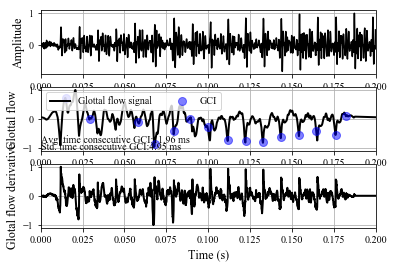

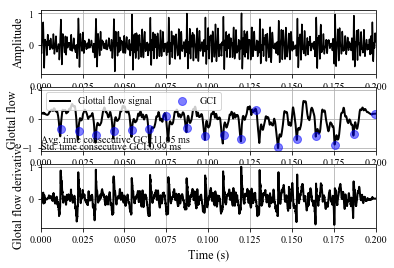

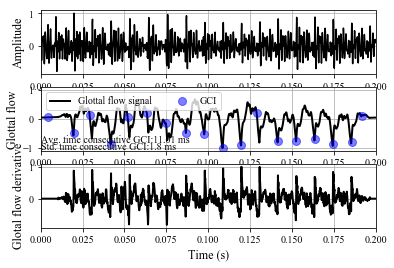

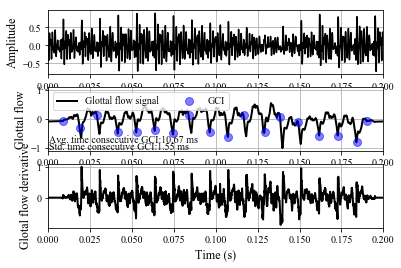

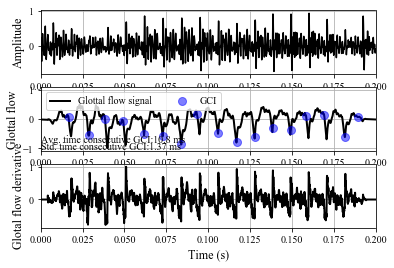

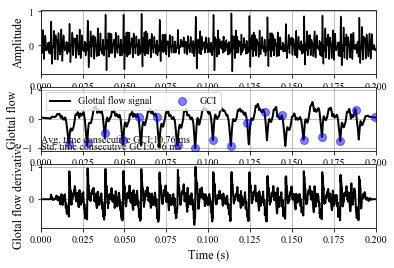

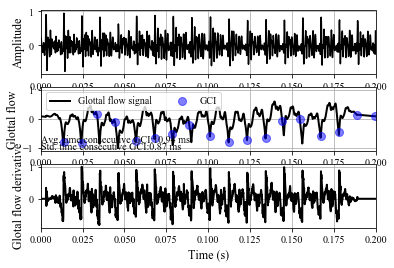

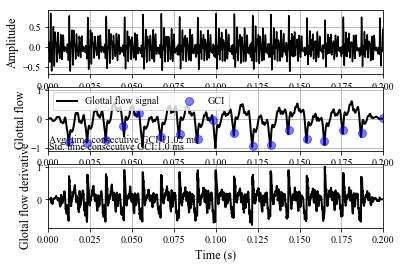

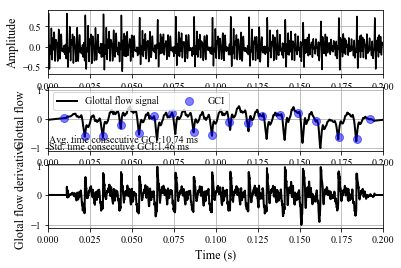

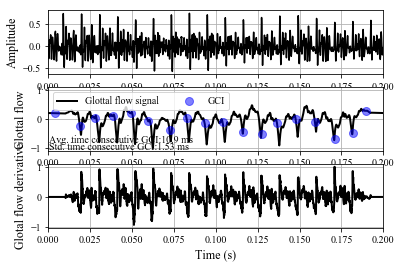

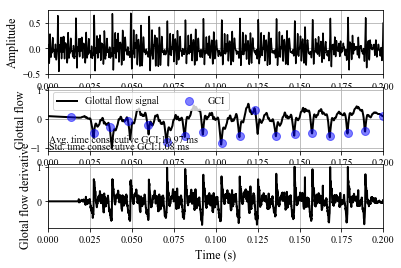

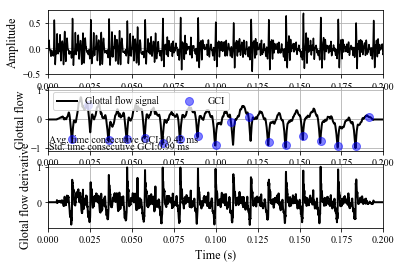

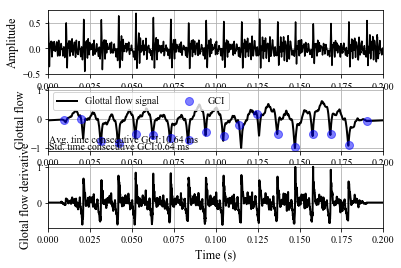

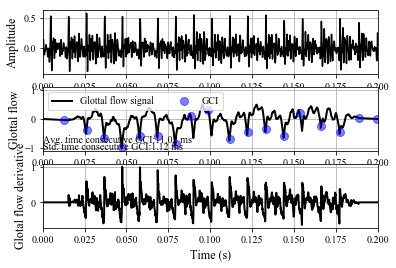

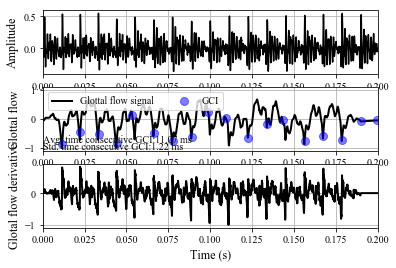

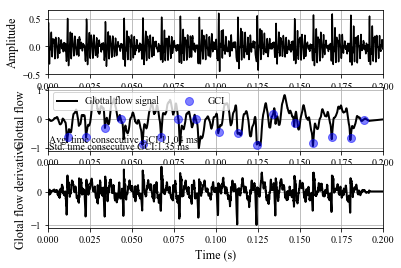

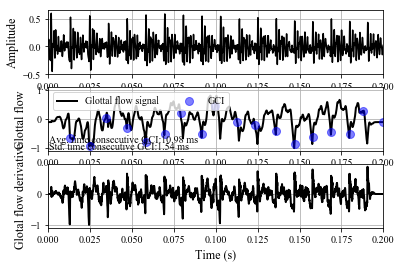

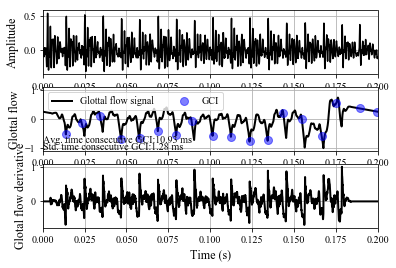

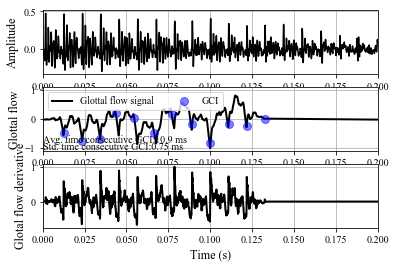

In [3]:
features1=glottalf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")

In [5]:
print(features1)

[ 1.39133182e-03  4.88523829e-03  1.96009513e-03  5.05927665e-01
  1.98855489e-01  7.90393130e+00  4.12248338e+00 -1.12855158e+01
  4.48775687e+01  8.89566834e-04  9.44603243e-04  4.73932722e-04
  8.26639125e-02  3.22396538e-02  9.37656569e-01  8.41242263e-01
  1.58819447e+01  4.84508517e+01  3.28819486e+00  6.98432191e-02
  3.99701071e-01  7.89863861e-01  6.59747194e-01 -2.70329428e-01
  1.39750791e-01 -7.43414455e-01  1.95488012e+00  1.05409000e+01
 -1.04540213e-01 -7.73261210e-01 -1.93349537e-02 -6.95031596e-01
 -2.45562189e-01 -1.28515772e+00  2.38269017e+00  3.24669851e+00]


## Extract static features and return them as a dataframe 

In [7]:
features1=glottalf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

   global avg avg H1H2  global avg avg HRF  global avg avg NAQ  \
0             7.903931          -11.285516            0.004885   

   global avg avg QOQ  global avg std H1H2  global avg std HRF  \
0            0.505928             4.122483           44.877569   

   global avg std NAQ  global avg std QOQ  global avg var GCI  \
0             0.00196            0.198855            0.001391   

   global kurtosis avg H1H2         ...          global skewness var GCI  \
0                 -0.245562         ...                         3.288195   

   global std avg H1H2  global std avg HRF  global std avg NAQ  \
0             0.937657           15.881945            0.000945   

   global std avg QOQ  global std std H1H2  global std std HRF  \
0            0.082664             0.841242           48.450852   

   global std std NAQ  global std std QOQ  global std var GCI  
0            0.000474             0.03224             0.00089  

[1 rows x 36 columns]


## Extract dynamic features and return them as a dataframe

In [8]:
features1=glottalf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1.head())

   avg H1H2    avg HRF   avg NAQ   avg QOQ  std H1H2     std HRF   std NAQ  \
0  7.330838 -18.254736  0.005056  0.458469  4.488912   10.392046  0.002491   
1  7.710707 -27.134866  0.005627  0.466531  3.937455   64.678781  0.001780   
2  9.225972 -58.348626  0.005067  0.476568  4.688587  199.202022  0.002166   
3  8.943952 -15.296443  0.004326  0.467168  4.688334   12.374536  0.001848   
4  9.541112 -14.608193  0.004309  0.485061  5.564800   14.512601  0.001639   

    std QOQ   var GCI  
0  0.266878  0.004950  
1  0.186812  0.000987  
2  0.215403  0.001797  
3  0.184792  0.001551  
4  0.164061  0.001365  


## Extract dynamic features and return them as a torch tensor

In [9]:
features1=glottalf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

torch.float64
torch.Size([19, 9])


## Extract static features from a path return them as a numpy array

In [11]:
path_audio="../audios/"
features1=glottalf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 098_u1_PCGITA.wav: 100%|██████████| 3/3 [01:08<00:00, 20.65s/it]  

(3, 36)
